In [1]:
import numpy as np
from scipy import interpolate
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, HTML
%matplotlib inline

In [2]:
#(1)
#(a)
#[i]

start = 0
stop = 2*np.pi
N = 128

#Create the discretized x array (0≦x≦1)
x = np.linspace(start, stop, N)

# Define step distance
h = x[1] - x[0]

#Create the discretized sin(x)
sin = np.sin(x)

print("sin = "+str(sin))

sin = [ 0.00000000e+00  4.94537199e-02  9.87864183e-02  1.47877370e-01
  1.96606441e-01  2.44854382e-01  2.92503125e-01  3.39436063e-01
  3.85538344e-01  4.30697148e-01  4.74801964e-01  5.17744860e-01
  5.59420747e-01  5.99727639e-01  6.38566896e-01  6.75843473e-01
  7.11466148e-01  7.45347746e-01  7.77405353e-01  8.07560519e-01
  8.35739449e-01  8.61873185e-01  8.85897772e-01  9.07754419e-01
  9.27389639e-01  9.44755382e-01  9.59809149e-01  9.72514103e-01
  9.82839151e-01  9.90759028e-01  9.96254351e-01  9.99311673e-01
  9.99923511e-01  9.98088370e-01  9.93810738e-01  9.87101086e-01
  9.77975832e-01  9.66457306e-01  9.52573698e-01  9.36358983e-01
  9.17852840e-01  8.97100557e-01  8.74152919e-01  8.49066083e-01
  8.21901439e-01  7.92725465e-01  7.61609559e-01  7.28629866e-01
  6.93867094e-01  6.57406313e-01  6.19336749e-01  5.79751564e-01
  5.38747630e-01  4.96425290e-01  4.52888114e-01  4.08242645e-01
  3.62598137e-01  3.16066292e-01  2.68760979e-01  2.20797963e-01
  1.72294617e-01  1

In [3]:
#first derivative operator
M_fd = 1/h*(-np.diag(np.ones(N)) + np.diag(np.ones(N-1), 1))

print("M_fd = "+str(M_fd))

M_fd = [[-20.21267777  20.21267777   0.         ...   0.           0.
    0.        ]
 [  0.         -20.21267777  20.21267777 ...   0.           0.
    0.        ]
 [  0.           0.         -20.21267777 ...   0.           0.
    0.        ]
 ...
 [  0.           0.           0.         ... -20.21267777  20.21267777
    0.        ]
 [  0.           0.           0.         ...   0.         -20.21267777
   20.21267777]
 [  0.           0.           0.         ...   0.           0.
  -20.21267777]]


sin_fd = [ 0.99959211  0.99714594  0.99225958  0.98494501  0.9752201   0.96310867
  0.94864035  0.93185055  0.91278036  0.89147643  0.86799092  0.84238129
  0.81471021  0.78504539  0.75345944  0.72002965  0.68483782  0.64797008
  0.60951665  0.56957163  0.52823278  0.48560125  0.44178137  0.39688037
  0.35100815  0.30427695  0.25680113  0.20869688  0.16008191  0.1110752
  0.06179666  0.0123669  -0.03709313 -0.08646238 -0.13562005 -0.18444583
 -0.23282024 -0.2806249  -0.32774282 -0.3740587  -0.4194592  -0.46383321
 -0.50707215 -0.54907019 -0.58972457 -0.62893579 -0.6666079  -0.70264871
 -0.73697002 -0.76948784 -0.80012259 -0.82879931 -0.85544782 -0.88000291
 -0.90240448 -0.92259772 -0.9405332  -0.95616704 -0.96946099 -0.98038249
 -0.98890484 -0.99500718 -0.99867456 -0.99989802 -0.99867456 -0.99500718
 -0.98890484 -0.98038249 -0.96946099 -0.95616704 -0.9405332  -0.92259772
 -0.90240448 -0.88000291 -0.85544782 -0.82879931 -0.80012259 -0.76948784
 -0.73697002 -0.70264871 -0.6666079  -0.628

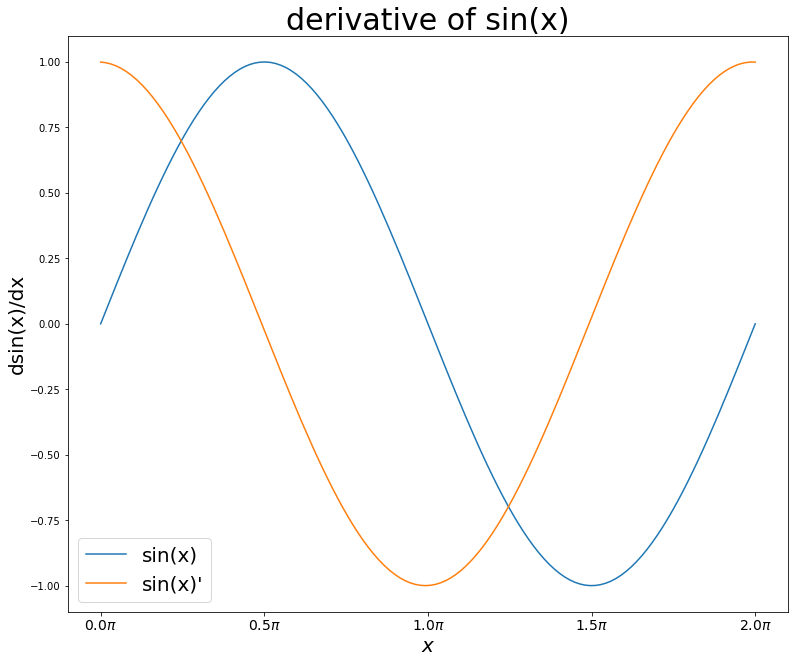

In [4]:
#(b)

#affect M_fd to sin
sin_fd = M_fd.dot(sin)

#f'_N-1 = f'_N-2
sin_fd[-1] = sin_fd[-2]

print("sin_fd = "+str(sin_fd))

fig = plt.figure(figsize = (10, 8))
ax1 = fig.add_axes([0, 0, 1, 1])
ax1.set_title(r"derivative of sin(x)", fontsize = 30)
ax1.set_xticks([i*np.pi/2 for i in range(5)])
ax1.set_xticklabels([f"{i/2}$\pi$" for i in range(5)], fontsize = 14)
ax1.set_xlabel(r"$x$", fontsize = 20)
ax1.set_ylabel(r"dsin(x)/dx", fontsize = 20)

#Plot(excluded the last point)
ax1.plot(x[0:len(x)], sin[0:len(x)], label = "sin(x)")
ax1.plot(x[0:len(x)], sin_fd[0:len(x)], label = "sin(x)'")
ax1.legend(fontsize = 20)

In [5]:
#(c)

#second derivative operator

M_sd = 1/(h*h)*(np.diag(np.ones(N-1),-1) - 2*np.diag(np.ones(N), 0) + np.diag(np.ones(N-1), 1))

print("M_sd = "+str(M_sd))

M_sd = [[-817.10468548  408.55234274    0.         ...    0.
     0.            0.        ]
 [ 408.55234274 -817.10468548  408.55234274 ...    0.
     0.            0.        ]
 [   0.          408.55234274 -817.10468548 ...    0.
     0.            0.        ]
 ...
 [   0.            0.            0.         ... -817.10468548
   408.55234274    0.        ]
 [   0.            0.            0.         ...  408.55234274
  -817.10468548  408.55234274]
 [   0.            0.            0.         ...    0.
   408.55234274 -817.10468548]]


sin_sd = [-0.04944363 -0.04944363 -0.09876627 -0.14784721 -0.19656634 -0.24480444
 -0.29244347 -0.33936683 -0.38545971 -0.4306093  -0.47470513 -0.51763926
 -0.55930665 -0.59960532 -0.63843666 -0.67570563 -0.71132104 -0.74519573
 -0.7772468  -0.80739581 -0.835569   -0.8616974  -0.88571709 -0.90756928
 -0.92720049 -0.94456269 -0.95961339 -0.97231575 -0.9826387  -0.99055696
 -0.99605116 -0.99910786 -0.99971957 -0.9978848  -0.99360805 -0.98689976
 -0.97777637 -0.96626019 -0.95237942 -0.93616801 -0.91766564 -0.89691759
 -0.87397463 -0.84889291 -0.82173381 -0.79256378 -0.76145422 -0.72848126
 -0.69372558 -0.65727223 -0.61921043 -0.57963332 -0.53863775 -0.49632404
 -0.45279574 -0.40815938 -0.36252418 -0.31600183 -0.26870616 -0.22075293
 -0.17225948 -0.12334448 -0.07412763 -0.02472938  0.02472938  0.07412763
  0.12334448  0.17225948  0.22075293  0.26870616  0.31600183  0.36252418
  0.40815938  0.45279574  0.49632404  0.53863775  0.57963332  0.61921043
  0.65727223  0.69372558  0.72848126  0.76

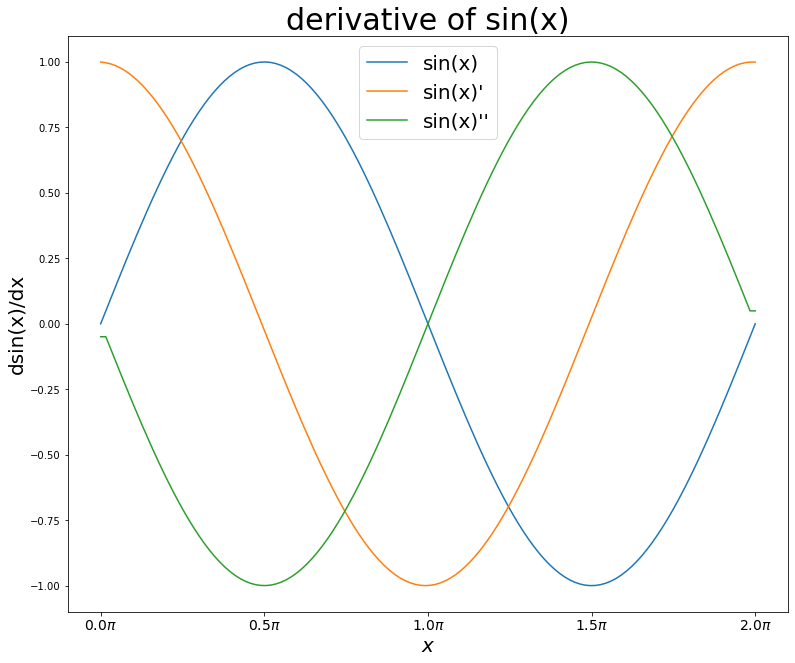

In [6]:
#(d)

#affect M_sd to sin
sin_sd = M_sd.dot(sin)

#f"_0 = f"_1, f"_N-1 = f"_N-2
sin_sd[0] = sin_sd[1]
sin_sd[-1] = sin_sd[-2]
print("sin_sd = "+str(sin_sd))

fig = plt.figure(figsize = (10, 8))
ax1 = fig.add_axes([0, 0, 1, 1])
ax1.set_title(r"derivative of sin(x)", fontsize = 30)
ax1.set_xticks([i*np.pi/2 for i in range(5)])
ax1.set_xticklabels([f"{i/2}$\pi$" for i in range(5)], fontsize = 14)
ax1.set_xlabel(r"$x$", fontsize = 20)
ax1.set_ylabel(r"dsin(x)/dx", fontsize = 20)

#Plot(excluded the last point)
ax1.plot(x[0:len(x)], sin[0:len(x)], label = "sin(x)")
ax1.plot(x[0:len(x)], sin_fd[0:len(x)], label = "sin(x)'")
ax1.plot(x[0:len(x)], sin_sd[0:len(x)], label = "sin(x)''")

ax1.legend(fontsize = 20)

In [7]:
# m = hbar = a = 1
m = 1
hbar = 1
a = 1

x = np.linspace(0, a, N)
h = x[1] - x[0]
M_sd = 1/(h*h)*(np.diag(np.ones(N-1),-1) - 2*np.diag(np.ones(N), 0) + np.diag(np.ones(N-1), 1))

# Define the Hamiltonian operator
V_inside = 0*x
H = - hbar*hbar/(2*m)*M_sd + np.diag(V_inside)

print("H = "+str(H))

# np.linalg.eigh(H) computes the eigenvalues and eigenvectors
E, psi = np.linalg.eigh(H)
psiT = np.transpose(psi) #To be accessed as psi[n]

print(f"E_1 ={E[0]:<8.4f}")
print(f"E_2 ={E[1]:<8.4f}") 
print(f"E_3 ={E[2]:<8.4f}")
print(f"E_4 ={E[3]:<8.4f}")
print(f"E_5 ={E[4]:<8.4f}")

E_k = np.zeros(5)
for n in range(5):
    #the known results
    E_k[n] = ((n+1)*np.pi*hbar)**2/(2*m*(a**2))
    print(f"Actual Value E_{n+1}　= {E_k[n]:<8.4f}")


H = [[16129.  -8064.5     0.  ...     0.      0.      0. ]
 [-8064.5 16129.  -8064.5 ...     0.      0.      0. ]
 [    0.  -8064.5 16129.  ...     0.      0.      0. ]
 ...
 [    0.      0.      0.  ... 16129.  -8064.5     0. ]
 [    0.      0.      0.  ... -8064.5 16129.  -8064.5]
 [    0.      0.      0.  ...     0.  -8064.5 16129. ]]
E_1 =4.7827  
E_2 =19.1281 
E_3 =43.0276 
E_4 =76.4670 
E_5 =119.4266
Actual Value E_1　= 4.9348  
Actual Value E_2　= 19.7392 
Actual Value E_3　= 44.4132 
Actual Value E_4　= 78.9568 
Actual Value E_5　= 123.3701


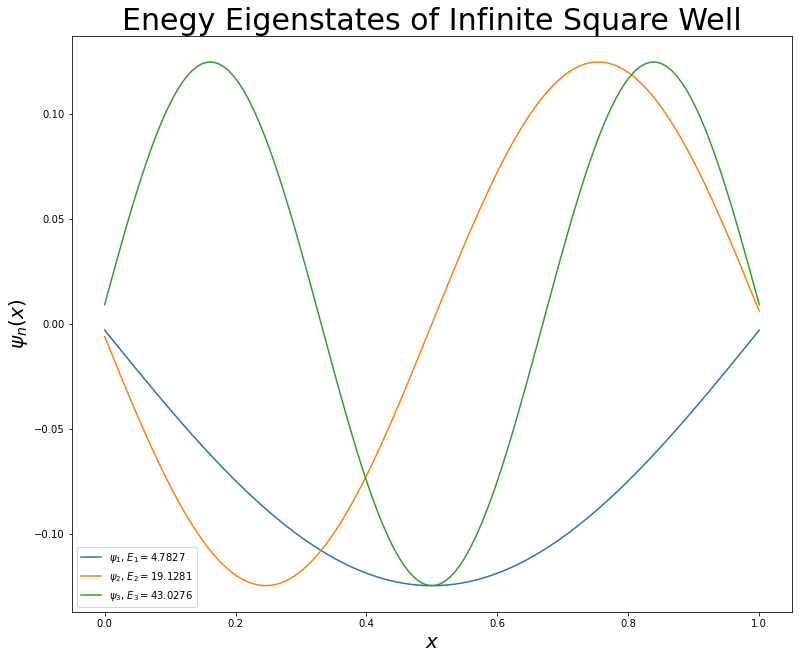

In [8]:
fig = plt.figure(figsize = (10, 8))
ax1 = fig.add_axes([0, 0, 1, 1])
ax1.set_title(r"Enegy Eigenstates of Infinite Square Well", fontsize = 30)

ax1.set_xlabel(r"$x$", fontsize = 20)
ax1.set_ylabel(r"$\psi_{n}(x)$", fontsize = 20)

#Plot(excluded the last point)
ax1.plot(x[0:len(x)], psiT[0][0:len(x)], label = f"$\psi_{1}$,$~E_1 ={E[0]:<8.4f}$ ")
ax1.plot(x[0:len(x)], psiT[1][0:len(x)], label = f"$\psi_{2}$,$~E_2 ={E[1]:<8.4f}$ ")
ax1.plot(x[0:len(x)], psiT[2][0:len(x)], label = f"$\psi_{3}$,$~E_3 ={E[2]:<8.4f}$ ")

ax1.legend()

In [9]:
# Check the normalization condition
for l in range(5):
    for m in range(5):
        print(f"{np.sum(psiT[l]*psiT[m]) :16.9f}")
    print()
    
# It is already normalized

     1.000000000
     0.000000000
    -0.000000000
    -0.000000000
     0.000000000

     0.000000000
     1.000000000
    -0.000000000
    -0.000000000
     0.000000000

    -0.000000000
    -0.000000000
     1.000000000
    -0.000000000
     0.000000000

    -0.000000000
    -0.000000000
    -0.000000000
     1.000000000
     0.000000000

     0.000000000
     0.000000000
     0.000000000
     0.000000000
     1.000000000



In [10]:
#(d) 
#Vector(Matrix) operation

#For this problem, the energy eigenstates are real functions.

#Make a Table
Table = []
for n in range(18):
    Table.append([3*(n+1), 3*(n+1) + 1,3*(n+1) + 2])

#Define x operator
Mx = np.diag(x)

#Define x^2 operator
Mxx = Mx.dot(Mx)

#Define p operator
Mp = -(0 + 1j)*hbar*M_fd

#Define p^2 operator
Mpp = -hbar*hbar*M_sd
    
for n in range(3):

    #Calculate <x> = <psi_n|x|psi_n>
    expectation_value_x = np.transpose(psiT[n]).dot(Mx.dot(psiT[n]))
    Table[0 + 6*n][0] = expectation_value_x

    print("<x> = "+str(expectation_value_x)+" (n = "+str(n+1)+")")

    #Calculate <x^2> = <psi_n|x^2|psi_n>
    expectation_value_xx = np.transpose(psiT[n]).dot(Mxx.dot(psiT[n]))
    Table[1 + 6*n][0] = expectation_value_xx

    print("<x^2> = "+str(expectation_value_xx)+" (n = "+str(n+1)+")")

    #Calculate sigma_x = √(<x^2> - <x>^2)
    sigma_x = np.sqrt(expectation_value_xx - (expectation_value_x)**2)
    Table[2 + 6*n][0] = sigma_x

    print("sigma_x = "+str(sigma_x)+" (n = "+str(n+1)+")")

    #Calculate <p> = <psi_n|p|psi_n>
    expectation_value_p = np.transpose(psiT[n]).dot(Mp.dot(psiT[n]))
    Table[3 + 6*n][0] = np.real(expectation_value_p)

    print("<p> = "+str(expectation_value_p)+" (n = "+str(n+1)+")")

    #Calculate <p^2> = <psi_n|p^2|psi_n>
    expectation_value_pp = np.transpose(psiT[n]).dot(Mpp.dot(psiT[n]))
    Table[4 + 6*n][0] = expectation_value_pp

    print("<p^2> = "+str(expectation_value_pp)+" (n = "+str(n+1)+")")

    #Calculate sigma_p = √(<p^2> - <p>^2)
    sigma_p = np.sqrt(expectation_value_pp - (expectation_value_p)**2)
    Table[5 + 6*n][0] = np.real(sigma_p)

    print("sigma_p = "+str(sigma_p)+" (n = "+str(n+1)+")")

<x> = 0.49999999999999556 (n = 1)
<x^2> = 0.283709905867217 (n = 1)
sigma_x = 0.18360257587305645 (n = 1)
<p> = 0.005993668470077644j (n = 1)
<p^2> = 9.565469735493597 (n = 1)
sigma_p = (3.0928151673766937+0j) (n = 1)
<x> = 0.5000000000000029 (n = 2)
<x^2> = 0.32291147583654445 (n = 2)
sigma_x = 0.2700212507128681 (n = 2)
<p> = 0.023971119273431346j (n = 2)
<p^2> = 38.25620604153012 (n = 2)
sigma_p = (6.1852065976885+0j) (n = 2)
<x> = 0.5000000000000003 (n = 3)
<x^2> = 0.3301710203760251 (n = 3)
sigma_x = 0.2831448752423832 (n = 3)
<p> = 0.05392169069751972j (n = 3)
<p^2> = 86.05519358114985 (n = 3)
sigma_p = (9.276750569562466+0j) (n = 3)


In [11]:
#(d)
#Integration operation

for n in range(3):

    #Calculte psi_n*x*psi_n
    el_expectation_value_x = psiT[n]*Mx.dot(psiT[n])

    #Take sum
    expectation_value_x = np.sum(el_expectation_value_x)
    Table[0 + 6*n][1] = expectation_value_x

    print("<x> = "+str(expectation_value_x)+" (n = "+str(n+1)+")")
    
    #Calculte psi_n*x^2*psi_n
    el_expectation_value_xx = psiT[n]*Mxx.dot(psiT[n])
    expectation_value_xx = np.sum(el_expectation_value_xx)
    Table[1 + 6*n][1] = expectation_value_xx

    print("<x^2> = "+str(expectation_value_xx)+" (n = "+str(n+1)+")")

    #Calculate sigma_x = √(<x^2> - <x>^2)
    sigma_x = np.sqrt(expectation_value_xx - (expectation_value_x)**2)
    Table[2 + 6*n][1] = sigma_x

    print("sigma_x = "+str(sigma_x)+" (n = "+str(n+1)+")")

    #Calculte psi_n*p*psi_n
    el_expectation_value_p = psiT[n]*Mp.dot(psiT[n])

    #Take sum
    expectation_value_p = np.sum(el_expectation_value_p)
    Table[3 + 6*n][1] = np.real(expectation_value_p)

    print("<p> = "+str(expectation_value_p)+" (n = "+str(n+1)+")")

    #Calculte psi_n*p^2*psi_n
    el_expectation_value_pp = psiT[n]*Mpp.dot(psiT[n])
    expectation_value_pp = np.sum(el_expectation_value_pp)
    Table[4 + 6*n][1] = expectation_value_pp

    print("<p^2> = "+str(expectation_value_pp)+" (n = "+str(n+1)+")")

    #Calculate sigma_p = √(<p^2> - <p>^2)

    sigma_p = np.sqrt(expectation_value_pp - (expectation_value_p)**2)
    Table[5 + 6*n][1] = np.real(sigma_p)

    print("sigma_p = "+str(sigma_p)+" (n = "+str(n+1)+")")


<x> = 0.4999999999999955 (n = 1)
<x^2> = 0.283709905867217 (n = 1)
sigma_x = 0.1836025758730566 (n = 1)
<p> = 0.005993668470077679j (n = 1)
<p^2> = 9.565469735493595 (n = 1)
sigma_p = (3.0928151673766933+0j) (n = 1)
<x> = 0.5000000000000029 (n = 2)
<x^2> = 0.32291147583654445 (n = 2)
sigma_x = 0.2700212507128681 (n = 2)
<p> = 0.023971119273431388j (n = 2)
<p^2> = 38.25620604153012 (n = 2)
sigma_p = (6.1852065976885+0j) (n = 2)
<x> = 0.5000000000000003 (n = 3)
<x^2> = 0.3301710203760251 (n = 3)
sigma_x = 0.2831448752423832 (n = 3)
<p> = 0.053921690697519675j (n = 3)
<p^2> = 86.05519358114984 (n = 3)
sigma_p = (9.276750569562465+0j) (n = 3)


In [12]:
#Actual values
for n in range(3):
    expectation_value_x = a/2
    Table[0 + 6*n][2] = expectation_value_x
    expectation_value_xx = a*a/3 - a*a/(2*np.pi*np.pi)
    Table[1 + 6*n][2] = expectation_value_xx
    sigma_x = np.sqrt(1/12 - 1/(2*np.pi*np.pi*(n+1)*(n+1)))*a
    Table[2 + 6*n][2] = sigma_x
    expectation_value_p = 0
    Table[3 + 6*n][2] = expectation_value_p
    expectation_value_pp = (np.pi*hbar*(n+1)/a)**2
    Table[4 + 6*n][2] = expectation_value_pp
    sigma_p = np.pi*hbar*(n+1)/a
    Table[5 + 6*n][2] = sigma_p

In [13]:
df = pd.DataFrame(Table)
df.index = ["$n=1$  <$x$>", "<$x^2$>", "sigma_$x$", "<$p$>", "<$p^2$>", "sigma_$p$",
            "$n=2$  <$x$>", "<$x^2$>", "sigma_$x$", "<$p$>", "<$p^2$>", "sigma_$p$",
            "$n=3$  <$x$>", "<$x^2$>", "sigma_$x$", "<$p$>", "<$p^2$>", "sigma_$p$"]

df.columns = ["Vector op.","Integration op.", "Actual Value"]

In [14]:
df

,Vector op.,Integration op.,Actual Value
$n=1$ <$x$>,0.500000,0.500000,0.500000
<$x^2$>,0.283710,0.283710,0.282673
sigma_$x$,0.183603,0.183603,0.180756
<$p$>,0.000000,0.000000,0.000000
<$p^2$>,9.565470,9.565470,9.869604
sigma_$p$,3.092815,3.092815,3.141593
$n=2$ <$x$>,0.500000,0.500000,0.500000
<$x^2$>,0.322911,0.322911,0.282673
sigma_$x$,0.270021,0.270021,0.265835
<$p$>,0.000000,0.000000,0.000000
